# Mean Reversion Trading Strategy

Based on [Mean Reversion Trading Strategy Using Python](https://www.youtube.com/watch?v=qb3qCX8ZWVI) from [Computer Science](https://www.youtube.com/channel/UCbmb5IoBtHZTpYZCDBOC1CA)

**Disclaimer:** _Investing in the stock market involves risk and can lead to monetary loss. This material is purely for educational purposes and should not be taken as professional investment advice. Invest at your own discretion._

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('fivethirtyeight')

## Read the data

In [3]:
df = pd.read_csv('SLV.csv')

Show the data

In [4]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2016-05-13,16.160000,16.290001,16.080000,16.280001,6156500,0,0
1,2016-05-16,16.480000,16.549999,16.270000,16.320000,6588700,0,0
2,2016-05-17,16.309999,16.500000,16.290001,16.410000,5992300,0,0
3,2016-05-18,16.160000,16.320000,15.900000,16.000000,13533300,0,0
4,2016-05-19,15.570000,15.720000,15.530000,15.670000,17547100,0,0
...,...,...,...,...,...,...,...,...
1402,2021-12-07,20.680000,20.910000,20.670000,20.809999,18763300,0,0
1403,2021-12-08,20.700001,20.799999,20.629999,20.760000,14075400,0,0
1404,2021-12-09,20.459999,20.490000,20.270000,20.299999,23767500,0,0
1405,2021-12-10,20.520000,20.540001,20.400000,20.500000,17760800,0,0


Set the date as the index

In [5]:
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

Show the data

In [6]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
2016-05-13,2016-05-13,16.160000,16.290001,16.080000,16.280001,6156500,0,0
2016-05-16,2016-05-16,16.480000,16.549999,16.270000,16.320000,6588700,0,0
2016-05-17,2016-05-17,16.309999,16.500000,16.290001,16.410000,5992300,0,0
2016-05-18,2016-05-18,16.160000,16.320000,15.900000,16.000000,13533300,0,0
2016-05-19,2016-05-19,15.570000,15.720000,15.530000,15.670000,17547100,0,0
...,...,...,...,...,...,...,...,...
2021-12-07,2021-12-07,20.680000,20.910000,20.670000,20.809999,18763300,0,0
2021-12-08,2021-12-08,20.700001,20.799999,20.629999,20.760000,14075400,0,0
2021-12-09,2021-12-09,20.459999,20.490000,20.270000,20.299999,23767500,0,0
2021-12-10,2021-12-10,20.520000,20.540001,20.400000,20.500000,17760800,0,0


Remove or drop the date column

In [7]:
df.drop(['Date'], inplace=True, axis=1)

Show the data

In [8]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2016-05-13,16.160000,16.290001,16.080000,16.280001,6156500,0,0
2016-05-16,16.480000,16.549999,16.270000,16.320000,6588700,0,0
2016-05-17,16.309999,16.500000,16.290001,16.410000,5992300,0,0
2016-05-18,16.160000,16.320000,15.900000,16.000000,13533300,0,0
2016-05-19,15.570000,15.720000,15.530000,15.670000,17547100,0,0
...,...,...,...,...,...,...,...
2021-12-07,20.680000,20.910000,20.670000,20.809999,18763300,0,0
2021-12-08,20.700001,20.799999,20.629999,20.760000,14075400,0,0
2021-12-09,20.459999,20.490000,20.270000,20.299999,23767500,0,0
2021-12-10,20.520000,20.540001,20.400000,20.500000,17760800,0,0


Create a function to calculate the simple moving average

In [9]:
def SMA(data, period=30, column='Close'):
    return data[column].rolling(window=period).mean()

Build and show the dataset

In [10]:
df['SMA'] = SMA(df, 21)
df['Simple_Returns'] = df.pct_change(1)['Close']
df['Log_Returns'] = np.log(1+df['Simple_Returns'])
df['Ratios'] = df['Close'] / df['SMA']

Show the data

In [11]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA,Simple_Returns,Log_Returns,Ratios
2016-05-13,16.160000,16.290001,16.080000,16.280001,6156500,0,0,NaN,NaN,NaN,NaN
2016-05-16,16.480000,16.549999,16.270000,16.320000,6588700,0,0,NaN,0.002457,0.002454,NaN
2016-05-17,16.309999,16.500000,16.290001,16.410000,5992300,0,0,NaN,0.005515,0.005500,NaN
2016-05-18,16.160000,16.320000,15.900000,16.000000,13533300,0,0,NaN,-0.024985,-0.025302,NaN
2016-05-19,15.570000,15.720000,15.530000,15.670000,17547100,0,0,NaN,-0.020625,-0.020841,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-07,20.680000,20.910000,20.670000,20.809999,18763300,0,0,22.055714,0.004829,0.004817,0.943520
2021-12-08,20.700001,20.799999,20.629999,20.760000,14075400,0,0,21.965714,-0.002403,-0.002406,0.945109
2021-12-09,20.459999,20.490000,20.270000,20.299999,23767500,0,0,21.859524,-0.022158,-0.022407,0.928657
2021-12-10,20.520000,20.540001,20.400000,20.500000,17760800,0,0,21.746667,0.009852,0.009804,0.942673


Get some statistics on the Ratio column

In [12]:
df['Ratios'].describe()

count    1387.000000
mean        1.002525
std         0.044221
min         0.723826
25%         0.980286
50%         0.999908
75%         1.024337
max         1.289209
Name: Ratios, dtype: float64

Get and show the percentile values

In [13]:
percentiles = [15, 20, 50, 80, 85]

Remove any NA values in the Ratios column and store the result in a new variable called ratios

In [14]:
ratios = df['Ratios'].dropna()

Get the values of the percentiles

In [15]:
pecentile_values = np.percentile(ratios, percentiles)

Show the values of the percentiles

In [16]:
pecentile_values

array([0.96735343, 0.97477517, 0.99990799, 1.02959645, 1.0366027 ])

Plot the ratios

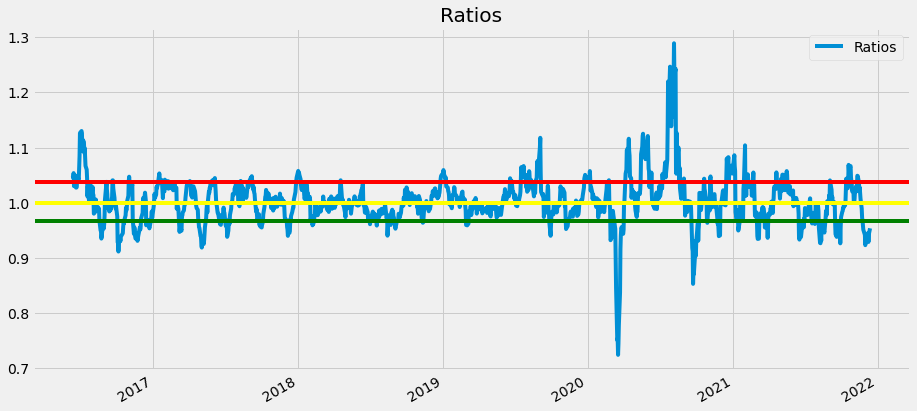

In [17]:
plt.figure(figsize=(14,7))
plt.title('Ratios')
df['Ratios'].dropna().plot(legend=True)
plt.axhline(pecentile_values[0], c='green', label = '15th percentile')
plt.axhline(pecentile_values[2], c='yellow', label = '50th percentile')
plt.axhline(pecentile_values[-1], c='red', label = '85th percentile')
plt.show()

Create buy and sell signals for the strategy

In [18]:
sell = pecentile_values[-1] # The 85th percentile threshold where we want to sell
buy = pecentile_values[0] # The 15th percentile threshold where we want to buy

Put -1 where the ratio is greater than the percentile to sell and nan otherwise

In [19]:
df['Positions'] = np.where(df.Ratios > sell, -1, np.nan)

Put 1 where the ratio is less than the percentile to buy and current value otherwise

In [20]:
df['Positions'] = np.where(df.Ratios < buy, 1, df['Positions'])

Use ffill to fill the missing values in the data frame

In [21]:
df['Positions'] = df['Positions'].ffill()

Get the buy and sell signals

In [22]:
df['Buy'] = np.where(df.Positions == 1, df['Close'], np.nan)
df['Sell'] = np.where(df.Positions == -1, df['Close'], np.nan)

Visualize the buy and sell signals along with the close price

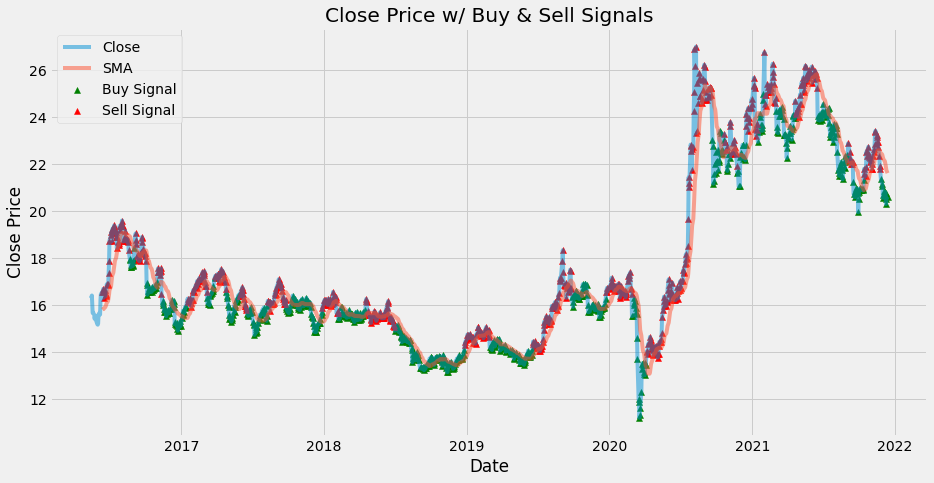

In [23]:
plt.figure(figsize=(14,7))
plt.title('Close Price w/ Buy & Sell Signals')
plt.plot(df['Close'], alpha=0.5, label='Close')
plt.plot(df['SMA'], alpha=0.5, label='SMA')
plt.scatter(df.index, df['Buy'], color='green', label='Buy Signal', marker='^', alpha=1)
plt.scatter(df.index, df['Sell'], color='red', label='Sell Signal', marker='^', alpha=1)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Calculate the returns for the Mean Reversion Strategy

In [24]:
df['Strategy_Returns'] = df.Positions.shift(1) * df.Log_Returns

In [25]:
df['Strategy_Returns']

2016-05-13         NaN
2016-05-16         NaN
2016-05-17         NaN
2016-05-18         NaN
2016-05-19         NaN
                ...   
2021-12-07    0.004817
2021-12-08   -0.002406
2021-12-09   -0.022407
2021-12-10    0.009804
2021-12-13    0.005352
Name: Strategy_Returns, Length: 1407, dtype: float64

Plot the cumulative log returns & the cumulative Mean Reversion Strategy

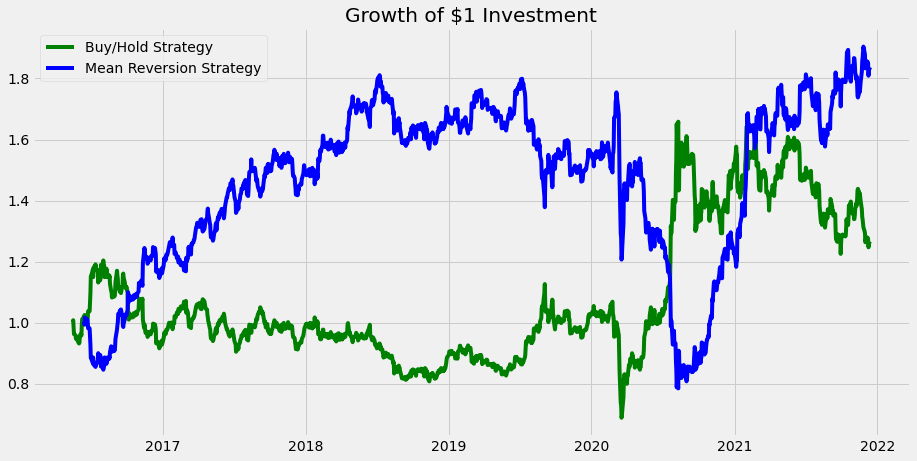

In [26]:
plt.figure(figsize=(14,7))
plt.title('Growth of $1 Investment')
plt.plot(np.exp(df['Log_Returns'].dropna()).cumprod(), c='green', label='Buy/Hold Strategy')
plt.plot(np.exp(df['Strategy_Returns'].dropna()).cumprod(), c='blue', label='Mean Reversion Strategy')
plt.legend()
plt.show()

Print the returns for both strategies

In [27]:
print("Buy & Hold Strategy Returns", np.exp(df['Log_Returns'].dropna()).cumprod()[-1]-1)
print("Mean Reversion Strategy Returns", np.exp(df['Strategy_Returns'].dropna()).cumprod()[-1]-1)

Buy & Hold Strategy Returns 0.26597050006625067
Mean Reversion Strategy Returns 0.8366893651378386


**THIS IS NOT AN INVESTMENT ADVICE!**